<a href="https://colab.research.google.com/github/Samson871/OIBSIP/blob/main/UNEMPLOYMENT_INDIA_ANALYSIS_%26_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:

import pandas as pd
df = pd.read_csv('/content/Unemployment in India.csv')
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [65]:
df.shape


(740, 7)

In [66]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [67]:

df.dropna(inplace=True)

In [68]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [11]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [12]:
df[' Frequency'].value_counts()

 Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [13]:
df[' Frequency'] = 'Monthly'
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [14]:

df[' Frequency'].value_counts()


 Frequency
Monthly    740
Name: count, dtype: int64

In [70]:

# Transforming  data for EDA
df.columns= df.columns.str.strip()
df = df.rename(columns={'Region.1': 'Region'})
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

df  # Displaying the transformed DataFrame

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,September,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,May,2020


In [71]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])
df['Frequency_encoded'] = le.fit_transform(df['Frequency'])
df['Area_encoded'] = le.fit_transform(df['Area'])
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Region_encoded,Frequency_encoded,Area_encoded
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019,0,0,0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June,2019,0,0,0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July,2019,0,0,0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,August,2019,0,0,0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,September,2019,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,February,2020,27,1,1
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,March,2020,27,1,1
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,April,2020,27,1,1
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,May,2020,27,1,1


In [72]:

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'Estimated Unemployment Rate (%)' column
scaler.fit(df[['Estimated Unemployment Rate (%)']])

# Transform the 'Estimated Unemployment Rate (%)' column
df['Normalized_Unemployment_Rate'] = scaler.transform(df[['Estimated Unemployment Rate (%)']])

# Display the DataFrame with the normalized column
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Region_encoded,Frequency_encoded,Area_encoded,Normalized_Unemployment_Rate
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019,0,0,0,0.047563
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June,2019,0,0,0,0.039745
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July,2019,0,0,0,0.048866
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,August,2019,0,0,0,0.043263
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,September,2019,0,0,0,0.067370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,February,2020,27,1,1,0.098384
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,March,2020,27,1,1,0.086917
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,April,2020,27,1,1,0.203675
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,May,2020,27,1,1,0.198332


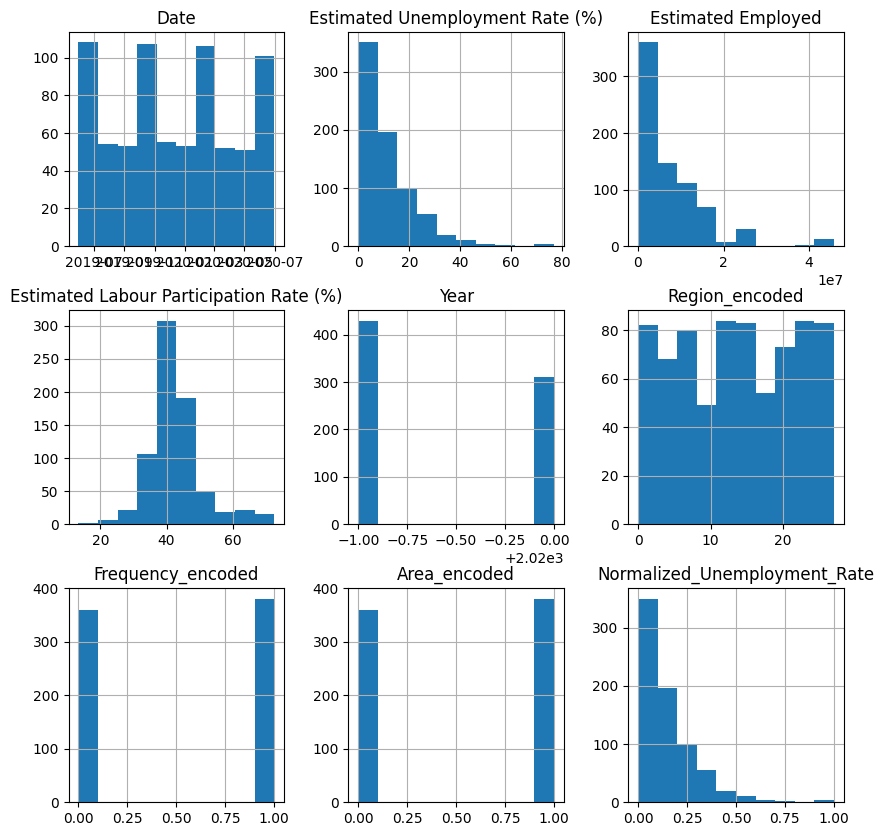

In [73]:
# prompt: Using dataframe df: use histogram to identify patterns and trends among data

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show() # Display histograms for each numerical column


Estimated Unemployment Rate (%)            1.000000
Estimated Employed                        -0.222876
Estimated Labour Participation Rate (%)    0.002558
Year                                       0.262602
Region_encoded                            -0.056726
Frequency_encoded                          0.132563
Area_encoded                               0.132563
Normalized_Unemployment_Rate               1.000000
Name: Estimated Unemployment Rate (%), dtype: float64


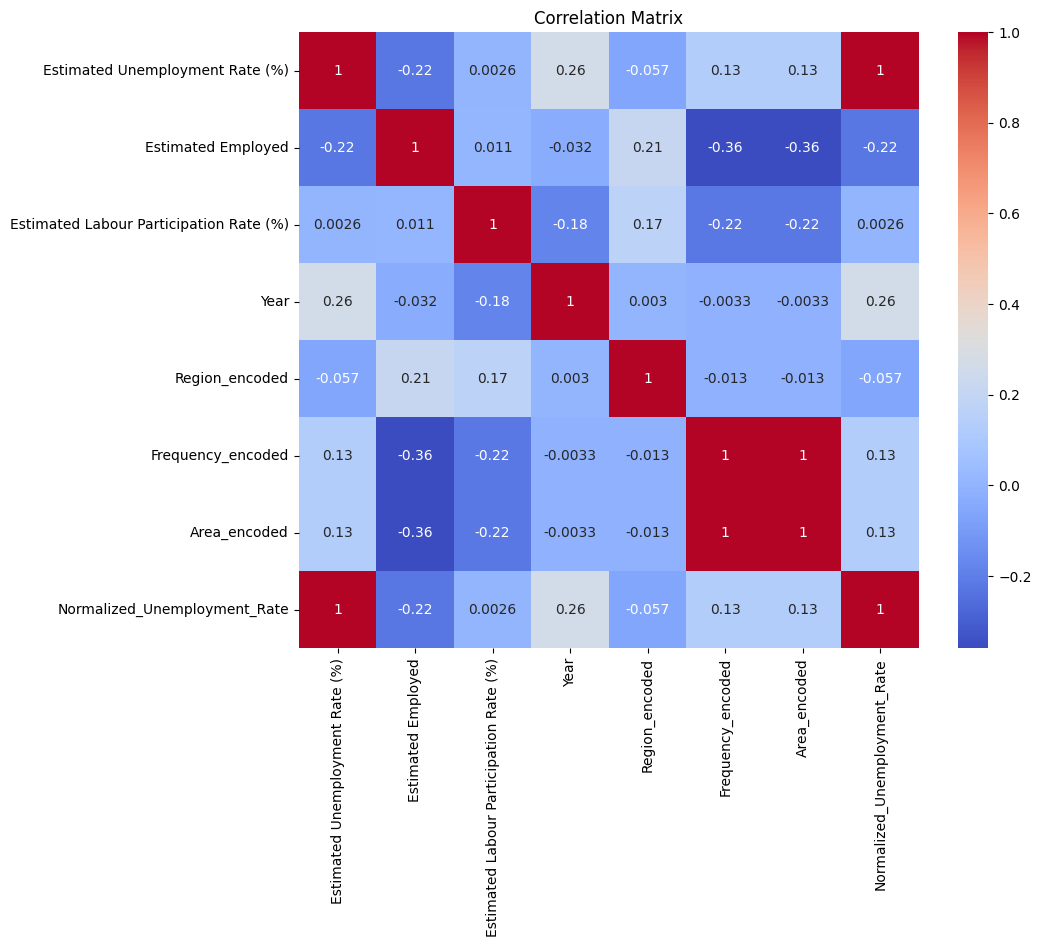

In [74]:
import matplotlib.pyplot as plt
correlation_matrix = df.select_dtypes(include=['number']).corr()

area_correlations = correlation_matrix['Estimated Unemployment Rate (%)']


print(area_correlations)


import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

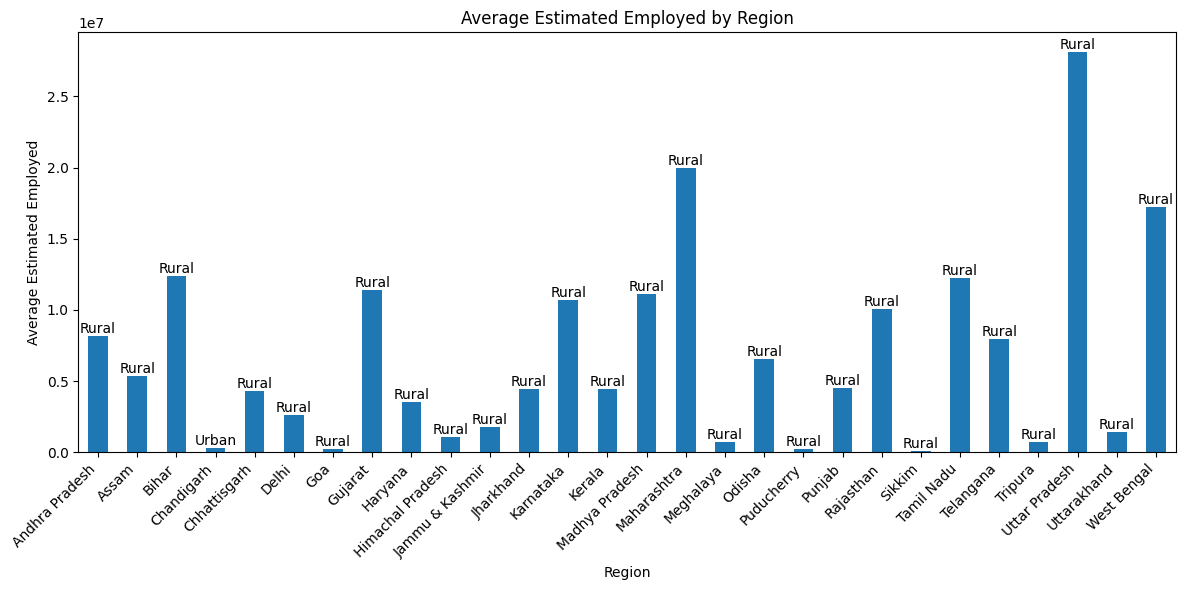

In [75]:

import matplotlib.pyplot as plt
region_employed = df.groupby('Region')['Estimated Employed'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
region_employed.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Estimated Employed')
plt.title('Average Estimated Employed by Region')
plt.xticks(rotation=45, ha='right')

# Add tag for area type
for i, region in enumerate(region_employed.index):
    area_type = df[df['Region'] == region]['Area'].iloc[0]
    plt.text(i, region_employed[region], area_type, ha='center', va='bottom')

plt.tight_layout()
plt.show()


Skipping column 'Region' because it is not numeric.
Skipping column 'Date' because it is not numeric.
Skipping column 'Frequency' because it is not numeric.


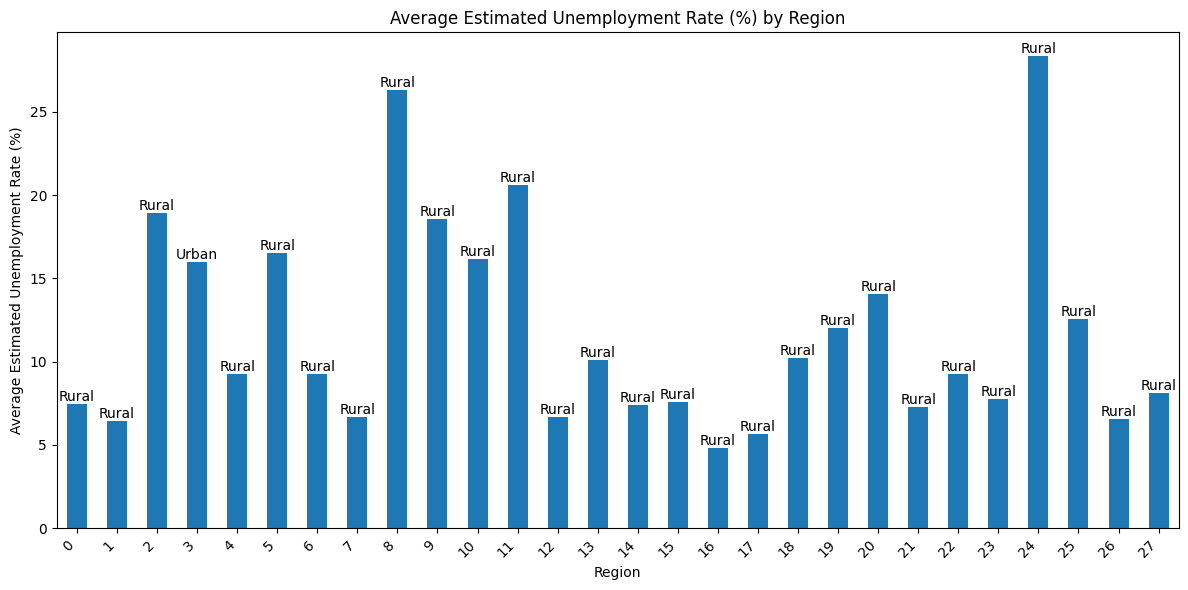

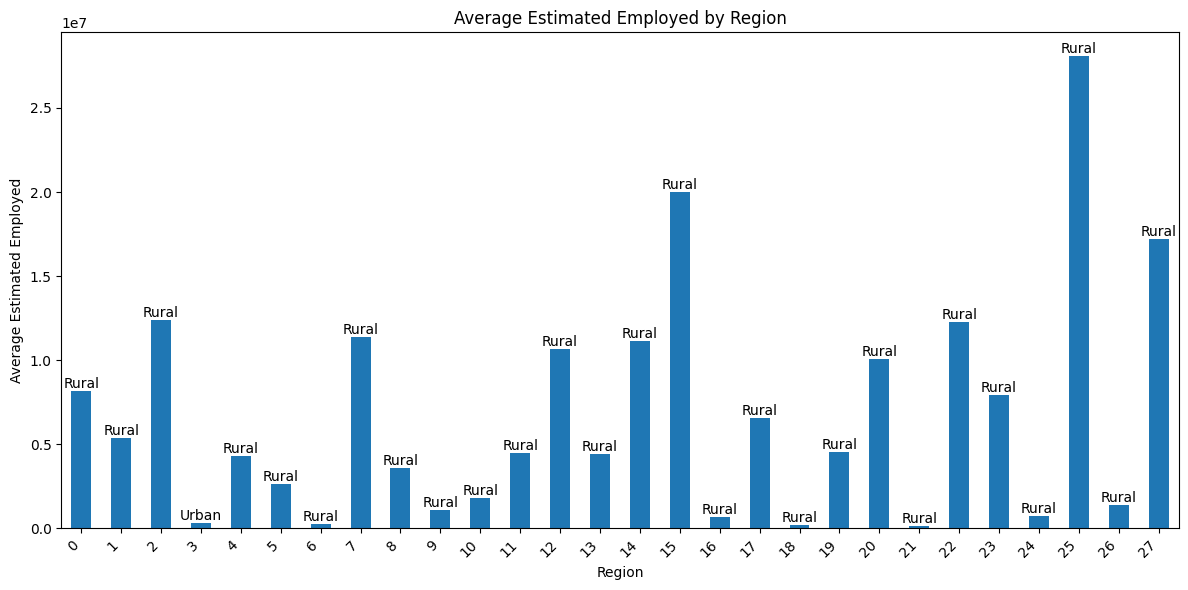

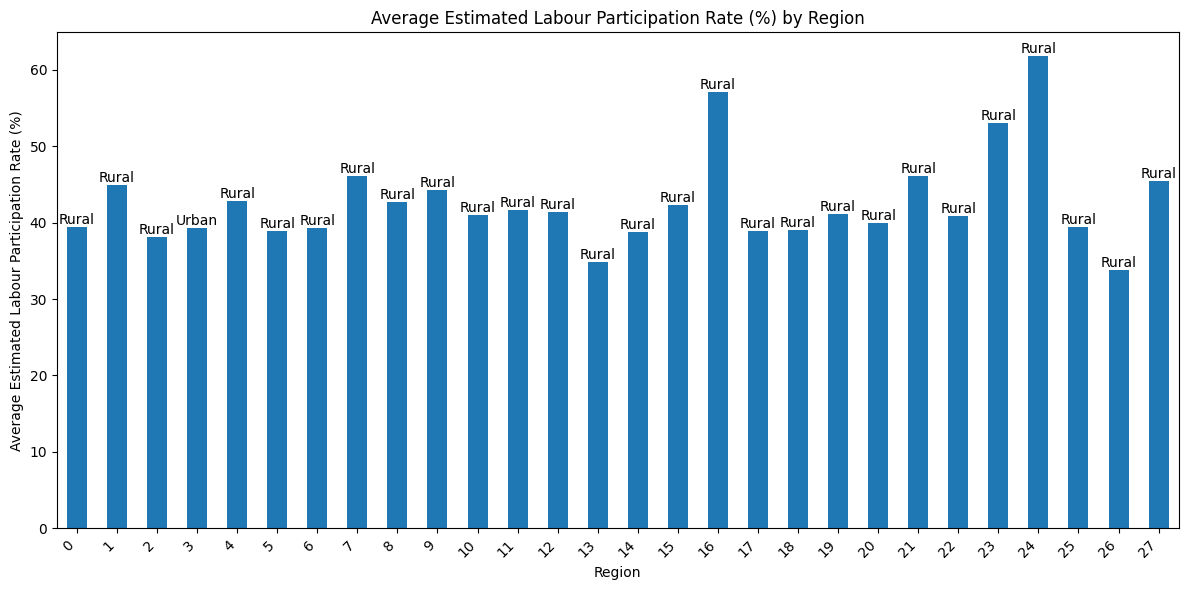

Skipping column 'Month' because it is not numeric.
Skipping column 'Year' because it is not numeric.


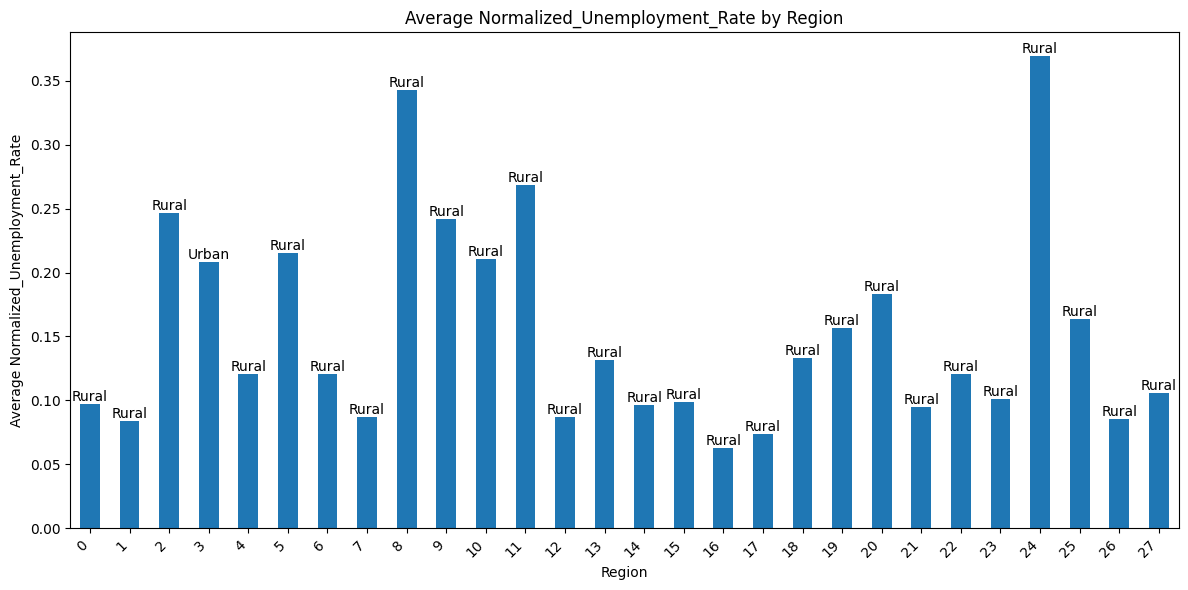

In [77]:
import matplotlib.pyplot as plt

# Iterate over columns except 'Area'
for column in df.columns:
    if column not in ['Area','Area_encoded','Frequency_encoded','Region_encoded']:
        # Group the DataFrame by 'Region' and calculate the mean of the current column for each region
        # Only calculate the mean for numeric columns
        if df[column].dtype in ['int64', 'float64']:
            region_data = df.groupby('Region_encoded')[column].mean()

            # Create a bar plot
            plt.figure(figsize=(12, 6))
            region_data.plot(kind='bar')
            plt.xlabel('Region')
            plt.ylabel(f'Average {column}')
            plt.title(f'Average {column} by Region')
            plt.xticks(rotation=45, ha='right')

            # Add tag for area type
            for i, region in enumerate(region_data.index):
                area_type = df[df['Region_encoded'] == region]['Area'].iloc[0]
                plt.text(i, region_data[region], area_type, ha='center', va='bottom')

            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping column '{column}' because it is not numeric.") # Inform the user about skipped columns

In [44]:
y=df['Estimated Unemployment Rate (%)']
y

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name: Estimated Unemployment Rate (%), Length: 740, dtype: float64

In [46]:
import plotly.express as px
fg = px.bar(df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',
            title='Unemploymeny Rate (State Wise) by Bar Graph',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [49]:
fg = px.bar(df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',
            title='Unemploymeny Rate (Region Wise) by Bar Graph',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [51]:
fg = px.box(df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',
            title='Unemploymeny Rate (Statewise) by Box Plot',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [54]:
fg = px.histogram(df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',
                  title='Unemploymeny Rate (Statewise) by Histogram',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()